In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
#import the county census data into a dataframe
def getCSV():
    dfl = pd.read_csv(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\historical.csv')
    dfl['County'] = dfl['County'].str.upper()
    return dfl
    
df = getCSV()
pop_dict = {} #each year will be an index, needed later

prev = 0
census_years = []
for val in df['CensusYear']:
    if val == prev:
        continue
    else: 
        census_years.append(val)
        pop_dict[val] = 0
        prev = val
print(census_years)

[1841, 1851, 1861, 1871, 1881, 1891, 1901, 1911, 1926, 1936, 1946, 1951, 1956, 1961, 1966, 1971, 1979, 1981, 1986, 1991, 1996, 2002, 2006, 2011, 2016, 2022]


In [4]:
#get the total population each year(row) and put them in a list
state_row = df[(df['County'] == "STATE") & (df['Sex'] == "Both sexes")]
pop_by_year = []

i = 0
while i < len(state_row):
    pop_by_year.append(state_row['VALUE'].values[i])
    i += 1
print(pop_by_year)

[6528799, 5111557, 4402111, 4053187, 3870020, 3468694, 3221823, 3139688, 2971992, 2968420, 2955107, 2960593, 2898264, 2818341, 2884002, 2978248, 3368217, 3443405, 3540643, 3525719, 3626087, 3917203, 4239848, 4588252, 4761865, 5149139]


In [5]:
pop_dict = {key: value for key, value in zip(pop_dict, pop_by_year)}
print(pop_dict)

{1841: 6528799, 1851: 5111557, 1861: 4402111, 1871: 4053187, 1881: 3870020, 1891: 3468694, 1901: 3221823, 1911: 3139688, 1926: 2971992, 1936: 2968420, 1946: 2955107, 1951: 2960593, 1956: 2898264, 1961: 2818341, 1966: 2884002, 1971: 2978248, 1979: 3368217, 1981: 3443405, 1986: 3540643, 1991: 3525719, 1996: 3626087, 2002: 3917203, 2006: 4239848, 2011: 4588252, 2016: 4761865, 2022: 5149139}


In [6]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')


In [7]:
#merge the two datasets together on common column county name 
def mergeData():
    merged_data = counties_shapefile.merge(df, how='left', left_on='ENGLISH', right_on='County')
    return merged_data
year_one = 1851
merged_data = mergeData()
merged_data = merged_data[merged_data['CensusYear'] == year_one]

In [8]:
def getListOfCounties():
    county_list = []
    for idx, row in merged_data.iterrows(): 
        if row['County'] not in county_list:
            county_list.append(row['County'])
        else:
            continue
    return county_list
print(getListOfCounties())

['DONEGAL', 'LIMERICK', 'KILDARE', 'WATERFORD', 'DUBLIN', 'WESTMEATH', 'MONAGHAN', 'WICKLOW', 'CORK', 'KERRY', 'ROSCOMMON', 'WEXFORD', 'LONGFORD', 'MEATH', 'CAVAN', 'CARLOW', 'MAYO', 'LOUTH', 'SLIGO', 'LEITRIM', 'KILKENNY', 'OFFALY', 'LAOIS', 'GALWAY', 'TIPPERARY', 'CLARE']


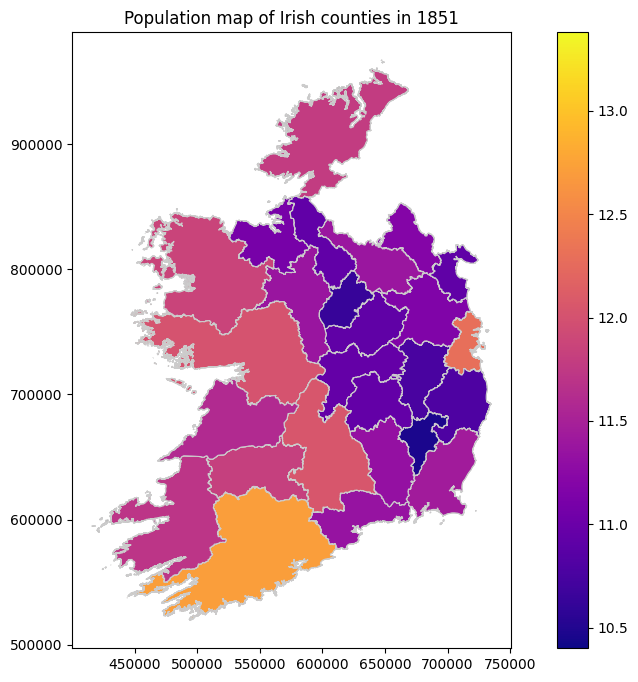

In [9]:
import numpy as np

#column containing the population values
column_to_plot = 'VALUE'

#need to scale the values so that the distribution isnt weighted heavily to one side(same colour on map)
merged_data['scaled_value'] = round(np.log1p(merged_data['VALUE']), 2)

#plot the populastion data for the selcted year on the map generated by the shapefile
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
title_string = "Population map of Irish counties in " + str(year_one)
ax.set_title(title_string)
#plt.savefig('2022.png')
plt.show()

In [10]:
merged_dataTwo = counties_shapefile.merge(df, how='left', left_on='ENGLISH', right_on='County')
yearTwo = 1841
merged_dataTwo = merged_dataTwo[merged_dataTwo['CensusYear'] == yearTwo]

In [11]:
merged_dataTwo['scaled_value'] = np.log1p(merged_dataTwo['VALUE'])

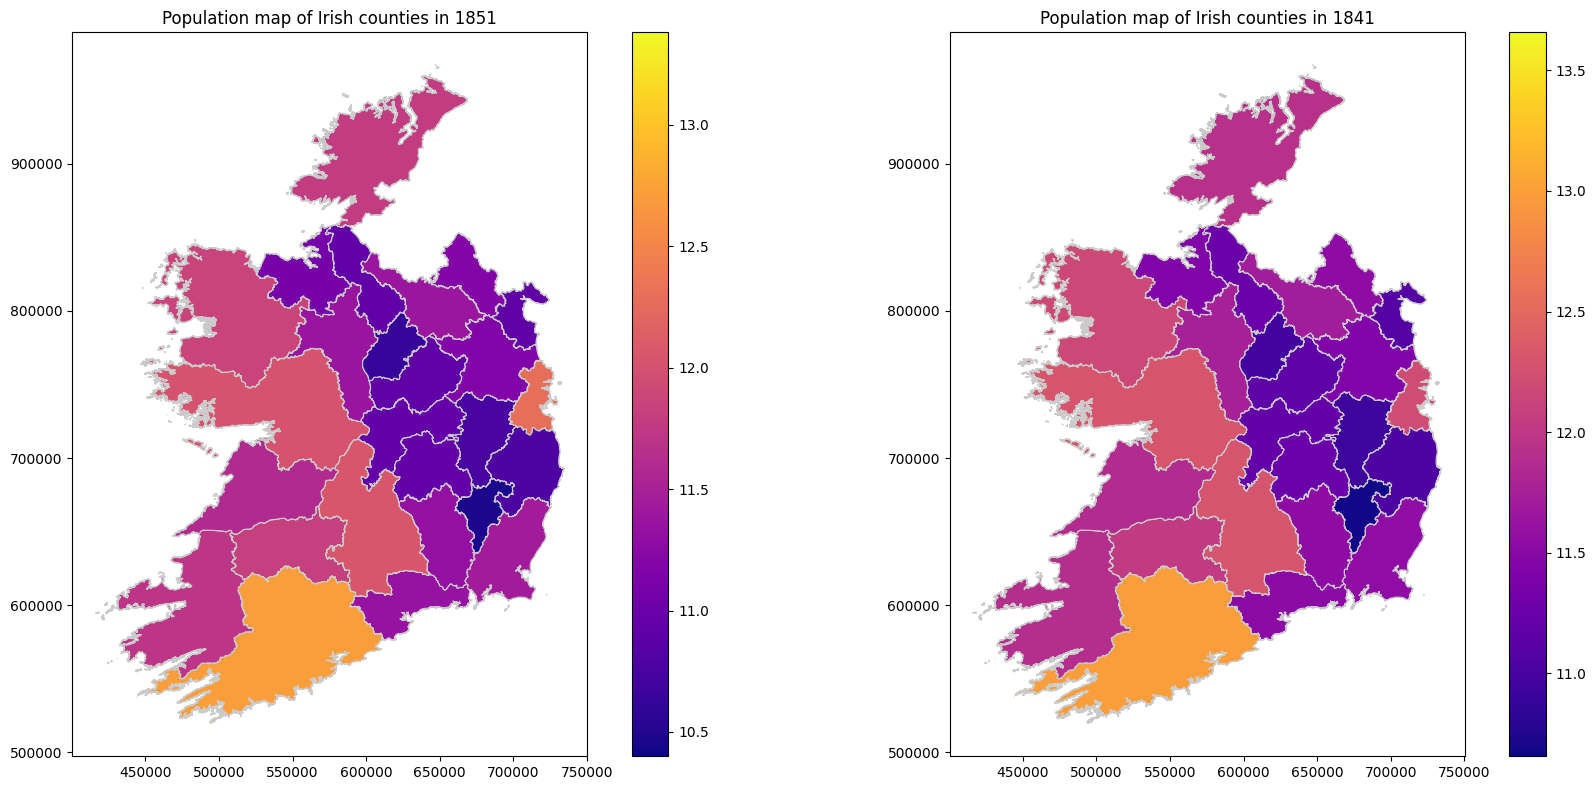

In [12]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first choropleth map
merged_data.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
title_string1 = "Population map of Irish counties in " + str(year_one)
axes[0].set_title(title_string1)

# Plot the second choropleth map
merged_dataTwo.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
title_string2 = "Population map of Irish counties in " + str(yearTwo)
axes[1].set_title(title_string2)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

#plt.savefig('1841and2022.png')

# Show the plots
plt.show()

In [12]:
df_pop = getCSV()
year = 1841

total_pop_this_year = pop_dict[year]

dict_of_counties = {} 

def getCountyPopPercentage(year):   
    state_row = df_pop[df_pop['CensusYear'] == year]
    prev_county = ""
    for idx, row in state_row.iterrows():
        if prev_county != row['County']:
            #calculate percentage
            dict_of_counties[row['County']] = ((round(row['VALUE'] / total_pop_this_year, 3))*100)
        else:
            continue
        prev_county = row['County']
    print(dict_of_counties)
getCountyPopPercentage(year)

{'STATE': 100.0, 'CARLOW': 1.3, 'DUBLIN': 5.7, 'KILDARE': 1.7999999999999998, 'KILKENNY': 3.1, 'LAOIS': 2.4, 'LONGFORD': 1.7999999999999998, 'LOUTH': 2.0, 'MEATH': 2.8000000000000003, 'OFFALY': 2.1999999999999997, 'WESTMEATH': 2.1999999999999997, 'WEXFORD': 3.1, 'WICKLOW': 1.9, 'CLARE': 4.3999999999999995, 'CORK': 13.100000000000001, 'KERRY': 4.5, 'LIMERICK': 5.1, 'TIPPERARY': 6.7, 'WATERFORD': 3.0, 'GALWAY': 6.7, 'LEITRIM': 2.4, 'MAYO': 6.0, 'ROSCOMMON': 3.9, 'SLIGO': 2.8000000000000003, 'CAVAN': 3.6999999999999997, 'DONEGAL': 4.5, 'MONAGHAN': 3.1}


In [ ]:

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map
merged_dataTwo.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

prev = ""
text_color = "#FFFFFF"
font_size = 10

for idx, row in merged_dataTwo.iterrows():
    if prev != row['County']:
        raw_pop_of_county = int(row['VALUE']/1000)
        if row['County'] == "OFFALY":
            plt.annotate(text=str(raw_pop_of_county), 
                     xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                     color=text_color, 
                     fontsize=font_size,
                     ha='right', va='bottom')  # Adjust ha and va as needed
        elif row['County'] == "CORK":
            plt.annotate(text=str(raw_pop_of_county), 
                     xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                     color=text_color, 
                     fontsize=font_size,
                     ha='left')  # Adjust ha and va as needed
        elif row['County'] == "KERRY":
            plt.annotate(text=str(raw_pop_of_county), 
                     xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                     color=text_color, 
                     fontsize=font_size,
                     ha='left')  # Adjust ha and va as needed
        else: 
            plt.annotate(text=str(raw_pop_of_county), 
                         xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                         color=text_color, 
                         fontsize=font_size, 
                         ha='center')  # Adjust ha and va as needed
    else:
        continue
    prev = row['County']

ax.set_facecolor('#385757') 
    
# Set title
year_one = "1841"
title_string = "Population of Irish counties, " + str(year_one) + " (per 1000)"
ax.set_title(title_string)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.savefig('1841-detailed.png')

# Show the plot
plt.show()

In [14]:
#Now need to get the population difference per county between 1851 and 2022
max_year = 1851
min_year = 2022

max_pop = pop_dict[max_year]
now_pop = pop_dict[min_year]

In [15]:
total_merged_data = mergeData()
max_year_data = total_merged_data[total_merged_data['CensusYear'] == max_year]
min_year_data = total_merged_data[total_merged_data['CensusYear'] == min_year]

diff_per_county = {}
counties = getListOfCounties()
diff_per_county = {value: 0 for value in counties}

for idx, row in max_year_data.iterrows():
    if row['Sex'] == "Both sexes":
        diff_per_county[row['County']] = row['VALUE']

for idx, row in min_year_data.iterrows():
    if row['Sex'] == "Both sexes":
        diff_per_county[row['County']] = row['VALUE'] - diff_per_county[row['County']]
                
print(diff_per_county)

{'DONEGAL': -88074, 'LIMERICK': -52596, 'KILDARE': 152051, 'WATERFORD': -36672, 'DUBLIN': 1053007, 'WESTMEATH': -15186, 'MONAGHAN': -76535, 'WICKLOW': 56872, 'CORK': -65152, 'KERRY': -81796, 'ROSCOMMON': -103177, 'WEXFORD': -16239, 'LONGFORD': -35597, 'MEATH': 80078, 'CAVAN': -92367, 'CARLOW': -6110, 'MAYO': -136529, 'LOUTH': 32041, 'SLIGO': -58317, 'LEITRIM': -76698, 'KILKENNY': -54588, 'OFFALY': -28926, 'LAOIS': -19787, 'GALWAY': -43947, 'TIPPERARY': -163672, 'CLARE': -84502}


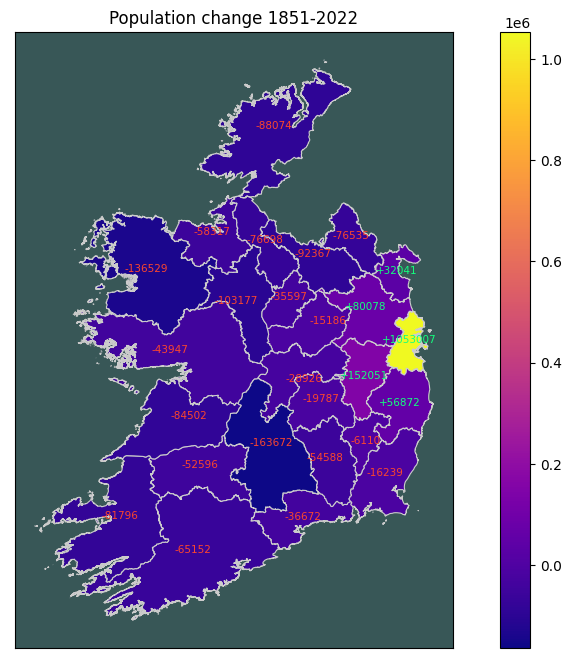

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

#merge the shapefile with the dictionary and create a new data column called 'Change'
merged_data = counties_shapefile.merge(pd.DataFrame(list(diff_per_county.items()), columns=['ENGLISH', 'Change']), on='ENGLISH')
merged_data.plot(column='Change', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

font_size = 7.5
text_color_growth = "#14ff7e"
text_color_decline = "#fc462d"
prev = ""
counties_to_adjust_left = ["CORK", "KERRY", "CLARE", "WESTMEATH", "MEATH"]
for idx, row in merged_data.iterrows():
    if prev != row['ENGLISH']:
        change = row['Change']
        if row['Change'] > 0: #counties that experienced population growth
            plt.annotate(text="+"+str(change), 
                             xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                             color=text_color_growth, 
                             fontsize=font_size, 
                             ha='center')
        else: #counties that experienced population decline
            if row["ENGLISH"] in counties_to_adjust_left:
                plt.annotate(text=str(change), 
                         xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                         color=text_color_decline, 
                         fontsize=font_size,
                         ha='left')
            else:
                plt.annotate(text=str(change), 
                             xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                             color=text_color_decline, 
                             fontsize=font_size, 
                             ha='center')
    else: 
        continue
    prev = row['ENGLISH']
    
title_string = "Population change 1851-2022"
ax.set_title(title_string)

ax.set_facecolor('#385757') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')


#plt.savefig('1851-2022-Population_Change.png')

plt.show()

In [17]:
df = getCSV()

dict_total_pop = {}
total_pop_df = df[(df['Sex'] == 'Both sexes') & (df['County'] == 'STATE')]
print(total_pop_df)

     STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0     FY001C01  Population at Each Census       1841        1841            -   
81    FY001C01  Population at Each Census       1851        1851            -   
162   FY001C01  Population at Each Census       1861        1861            -   
243   FY001C01  Population at Each Census       1871        1871            -   
324   FY001C01  Population at Each Census       1881        1881            -   
405   FY001C01  Population at Each Census       1891        1891            -   
486   FY001C01  Population at Each Census       1901        1901            -   
567   FY001C01  Population at Each Census       1911        1911            -   
648   FY001C01  Population at Each Census       1926        1926            -   
729   FY001C01  Population at Each Census       1936        1936            -   
810   FY001C01  Population at Each Census       1946        1946            -   
891   FY001C01  Population a

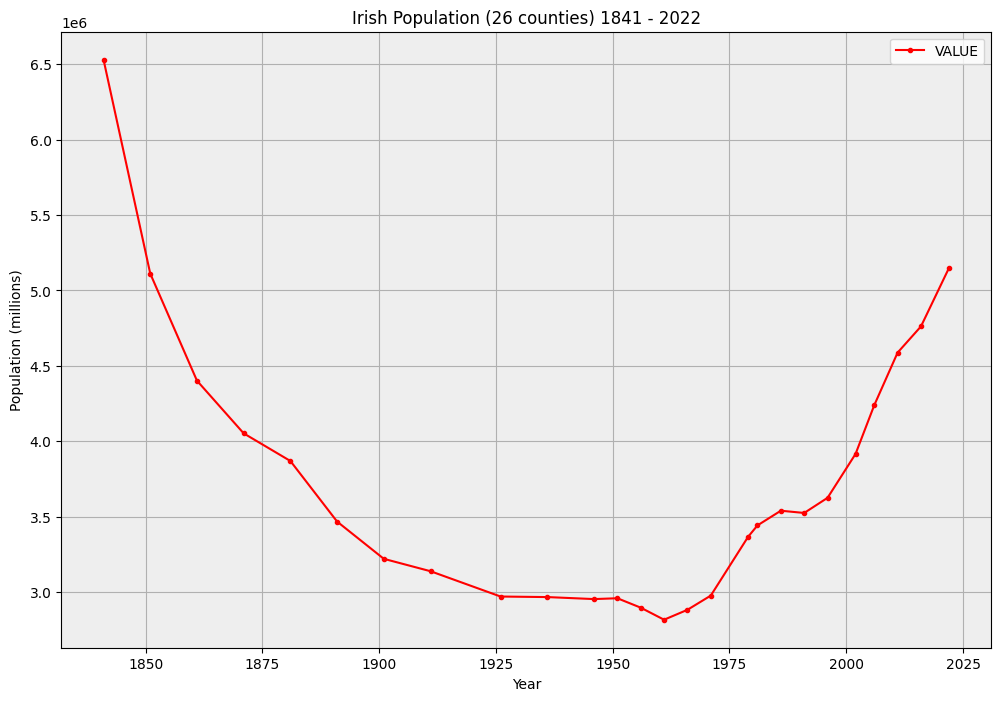

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

total_pop_df.plot(x="CensusYear", y="VALUE", kind="line", marker=".", linestyle="-", color="red", ax=ax)

title_string = 'Irish Population (26 counties) 1841 - 2022'

plt.title(title_string)
plt.xlabel('Year')
plt.ylabel('Population (millions)')
ax.set_facecolor('#EEEEEE') 
plt.grid(True)

#plt.savefig('1851-2022-LinePopulation_Change.png')

# Show the plot
plt.show()


In [19]:
def compareYears(sample_df,y1, y2):
    y1_dict = {}
    for idx,row in df.iterrows():
        if (row['County'] != "STATE") & (row['Sex'] == "Both sexes"):
            if (row["CensusYear"] == y1):
                y1_dict[row["County"]] = [row['VALUE']]
            elif (row["CensusYear"] == y2):
                y1_dict[row["County"]].append(row['VALUE'])
    return y1_dict
            
pops_dict = compareYears(df,1851, 2022)

In [20]:
counties_df = pd.DataFrame(list(pops_dict.items()), columns=['County', 'PopList'])

condition = counties_df['County'] == 'KILKENNY'
counties_df.loc[condition, 'County'] = 'Kk '

counties_df['County'] = counties_df['County'].str.capitalize()
counties_df['County'] = counties_df['County'].str[:3]
print(counties_df)

   County            PopList
0     Car     [68078, 61968]
1     Dub  [405147, 1458154]
2     Kil    [95723, 247774]
3     Kk    [158748, 104160]
4     Lao    [111664, 91877]
5     Lon     [82348, 46751]
6     Lou   [107662, 139703]
7     Mea   [140748, 220826]
8     Off    [112076, 83150]
9     Wes    [111407, 96221]
10    Wex   [180158, 163919]
11    Wic    [98979, 155851]
12    Cla   [212440, 127938]
13    Cor   [649308, 584156]
14    Ker   [238254, 156458]
15    Lim   [262132, 209536]
16    Tip   [331567, 167895]
17    Wat   [164035, 127363]
18    Gal   [321684, 277737]
19    Lei    [111897, 35199]
20    May   [274499, 137970]
21    Ros    [173436, 70259]
22    Sli    [128515, 70198]
23    Cav    [174071, 81704]
24    Don   [255158, 167084]
25    Mon    [141823, 65288]


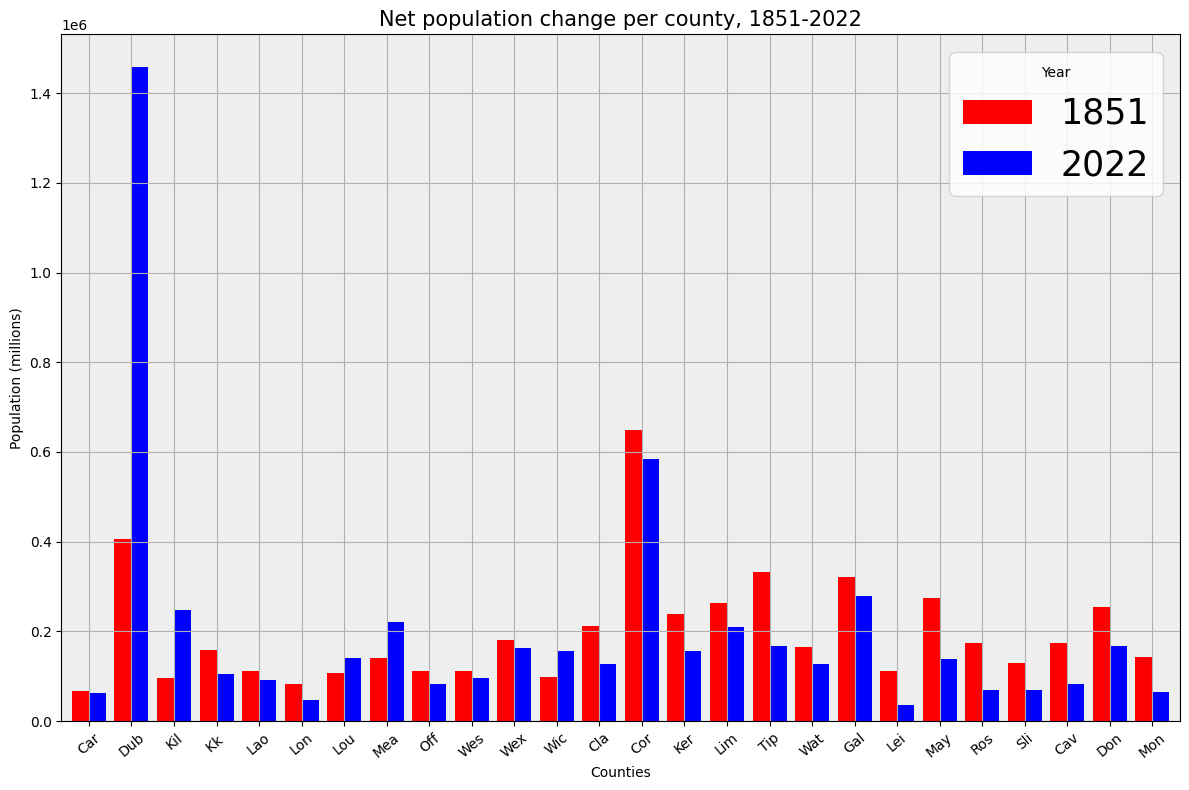

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

counties_df['Pop_Year1'] = counties_df['PopList'].apply(lambda x: x[0])
counties_df['Pop_Year2'] = counties_df['PopList'].apply(lambda x: x[1])
counties_df.plot(kind='bar', x='County', y=['Pop_Year1', 'Pop_Year2'], color=['red', 'blue'], width=0.8, ax=ax)

# Customize the plot
plt.title('Net population change per county, 1851-2022', fontsize='15')
plt.xlabel('Counties')
plt.xticks(rotation=40)
plt.ylabel('Population (millions)')
ax.set_facecolor('#EEEEEE') 
plt.grid(True)
plt.tight_layout()
plt.legend(title='Year', loc='upper right', labels=[1851, 2022], fontsize='25')

#plt.savefig('1851-2022-Population_Change_Barchart.png')

plt.show()

In [46]:
ireland_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\United_Ireland_Shape.shp')
print(ireland_shapefile)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

In [50]:
#Six Counties pop figures are from 2021 
year = 1841
modern_df = df[(df['CensusYear'] == year) & (df['Sex'] == "Both sexes")]
 
print(modern_df)

   STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0   FY001C01  Population at Each Census       1841        1841            -   
1   FY001C01  Population at Each Census       1841        1841           01   
2   FY001C01  Population at Each Census       1841        1841           02   
3   FY001C01  Population at Each Census       1841        1841           03   
4   FY001C01  Population at Each Census       1841        1841           04   
5   FY001C01  Population at Each Census       1841        1841           05   
6   FY001C01  Population at Each Census       1841        1841           06   
7   FY001C01  Population at Each Census       1841        1841           07   
8   FY001C01  Population at Each Census       1841        1841           08   
9   FY001C01  Population at Each Census       1841        1841           09   
10  FY001C01  Population at Each Census       1841        1841           10   
11  FY001C01  Population at Each Census       1841  

C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\1171885976.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(antrim_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\1171885976.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(armagh_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\1171885976.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(down_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\1171885976.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_

In [51]:
merged_data = ireland_shapefile.merge(modern_df, how='left', left_on='ENGLISH', right_on='County')
print(merged_data)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

Image saved


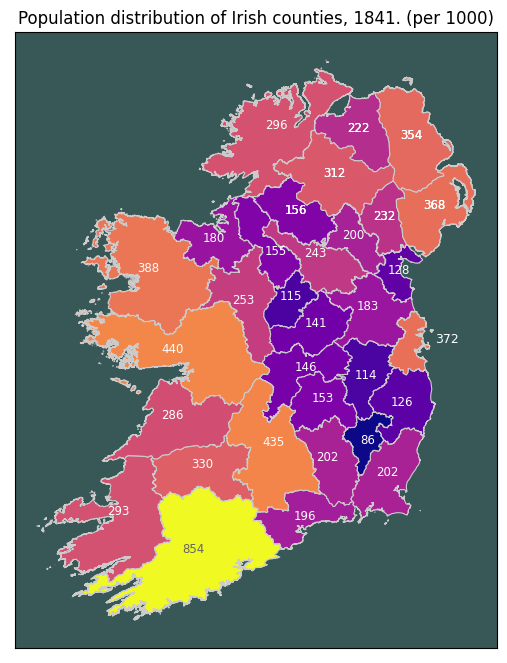

In [53]:
def plotIreland(data, year, savefig):
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    data['scaled_value'] = np.log1p(data['VALUE'])

    data.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    text_color = "#FEFEFE"
    font_size = 8.5
    for idx,row in data.iterrows():
        raw_pop_of_county = int(row['VALUE']/1000)
        if row['ENGLISH'] == "DUBLIN":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+29000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#FFFFFF", 
                            fontsize=font_size+.5, 
                            ha='center')
        elif row['ENGLISH'] == "OFFALY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+9000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CORK":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+14000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#656565", 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "WESTMEATH":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "SLIGO":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']-5000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "ROSCOMMON":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "LEITRIM":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-10000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KERRY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+12000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        else:
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')  # Adjust ha and va as needed
    title_string = "Population distribution of Irish counties, "+str(year)+". (per 1000)"
    ax.set_title(title_string)

    ax.set_facecolor('#385757') 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    if savefig == True:
        print("Image saved")
        plt.savefig(str(year)+"-AllIreland-Population")

    plt.show()
plotIreland(merged_data, year, True)

In [26]:
year = 1851

modern_df = df[(df['CensusYear'] == year) & (df['Sex'] == "Both sexes")]
temp = modern_df.iloc[0].copy()

antrim_row = temp
antrim_row['County'] = "ANTRIM"
antrim_row['VALUE'] = 352264
modern_df.loc[len(modern_df)] = antrim_row

armagh_row = temp
armagh_row['County'] = "ARMAGH"
armagh_row['VALUE'] = 196085
modern_df.loc[len(modern_df)] = armagh_row

down_row = temp
down_row['County'] = "DOWN"
down_row['VALUE'] = 328754
modern_df.loc[len(modern_df)] = down_row

fermanagh_row = temp
fermanagh_row['County'] = "FERMANAGH"
fermanagh_row['VALUE'] = 116007
modern_df.loc[len(modern_df)] = fermanagh_row

derry_row = temp
derry_row['County'] = "DERRY / LONDONDERRY"
derry_row['VALUE'] = 191868
modern_df.loc[len(modern_df)] = derry_row

tyrone_row = temp
tyrone_row['County'] = "TYRONE"
tyrone_row['VALUE'] = 255810
modern_df.loc[len(modern_df)] =tyrone_row

print(modern_df)

    STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
81   FY001C01  Population at Each Census       1851        1851            -   
84   FY001C01  Population at Each Census       1851        1851           01   
87   FY001C01  Population at Each Census       1851        1851           02   
90   FY001C01  Population at Each Census       1851        1851           03   
93   FY001C01  Population at Each Census       1851        1851           04   
96   FY001C01  Population at Each Census       1851        1851           05   
99   FY001C01  Population at Each Census       1851        1851           06   
102  FY001C01  Population at Each Census       1851        1851           07   
105  FY001C01  Population at Each Census       1851        1851           08   
108  FY001C01  Population at Each Census       1851        1851           09   
111  FY001C01  Population at Each Census       1851        1851           10   
114  FY001C01  Population at Each Census

C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\161256330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_df.loc[len(modern_df)] = antrim_row
C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\161256330.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_df.loc[len(modern_df)] = armagh_row
C:\Users\Tom\AppData\Local\Temp\ipykernel_19236\161256330.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_df.loc[len(mod

In [27]:
merged_data = ireland_shapefile.merge(modern_df, how='left', left_on='ENGLISH', right_on='County')

Image saved


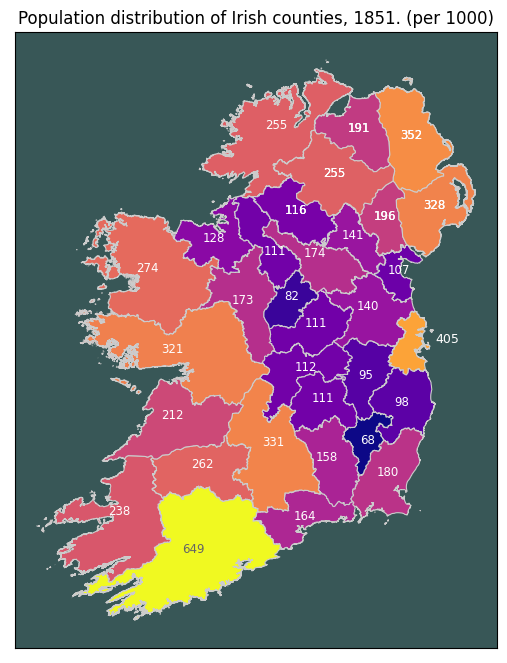

In [28]:
plotIreland(merged_data, year, True)